In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import scipy.stats as stats
import seaborn as sns

%pwd
os.chdir('C:\\Users\\Prudhvi\\Desktop\\Prudhvi\\Data Science\\Data')
#os.chdir('C:\\Users\\KASTU1\\Desktop\\Analytics Path\\R\\Data')
%pwd

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Prudhvi\\Desktop\\Prudhvi\\Data Science\\Data'

In [5]:
churn=pd.read_csv("Teleco_Cust_Attr.csv")

In [6]:
print(stats.ttest_1samp(churn["tenure"],0.58))

print(churn["tenure"].mean())
print(np.var(churn["tenure"]))
print(np.std(churn["tenure"]))
print(churn["tenure"].var())

Ttest_1sampResult(statistic=108.63402696849658, pvalue=0.0)
32.37114865824223
603.0824673302961
24.55773742286321
603.1681081237256


In [316]:
## This is to test the ttest--- not working correctly still working on it--- t-value is correct --- we have to work on p value

N=churn["customerID"].count()
print(N)
var_a = churn["tenure"].var(ddof=1)
var_b = churn["MonthlyCharges"].var(ddof=1)
s = np.sqrt((var_a + var_b)/2)
t = (churn["tenure"].mean() - churn["MonthlyCharges"].mean())/(s*np.sqrt(2/N))
print(t)
df = 2*N - 2
p = 1 - stats.t.cdf(t,df=df)
print(p)

7043
-69.98630233551279
1.0


col_0  count
Churn       
No      5174
Yes     1869


gender,Female,Male,All
Churn,,,
No,2549,2625,5174
Yes,939,930,1869
All,3488,3555,7043


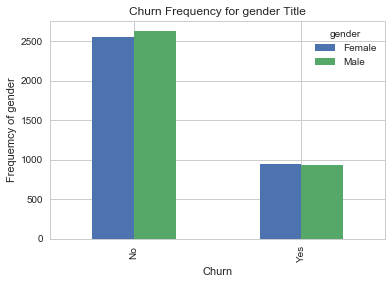

In [7]:
%matplotlib inline
pd.crosstab(churn.Churn,churn.gender).plot(kind='bar')
plt.title('Churn Frequency for gender Title')
plt.xlabel('Churn')
plt.ylabel('Frequemcy of gender')
plt.savefig('gender_Freq_Graph')

my_tab = pd.crosstab(index=churn["Churn"],  # Make a crosstab
            columns="count")      # Name the count column
print(my_tab)
# Table of survival vs. sex Table o 
survived_sex = pd.crosstab(index=churn["Churn"], columns=churn["gender"],margins=True)
#survived_class.columns = ["class1","class2","class3","rowtotal"]
#survived_sex.index= ["Yes","No"]
survived_sex

col_0  count
Churn       
No      5174
Yes     1869


Partner,No,Yes
Churn,,
No,2441,2733
Yes,1200,669


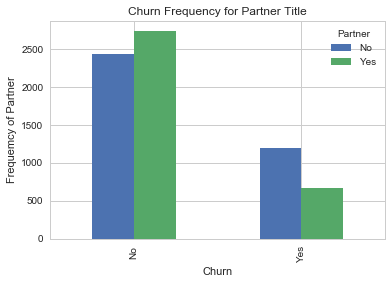

In [8]:
%matplotlib inline
pd.crosstab(churn.Churn,churn.Partner).plot(kind='bar')
plt.title('Churn Frequency for Partner Title')
plt.xlabel('Churn')
plt.ylabel('Frequemcy of Partner')
plt.savefig('Partner_Freq_Graph')

my_tab = pd.crosstab(index=churn["Churn"],  # Make a crosstab
            columns="count")   # Name the count column
print(my_tab)
# Table of survival vs. sex Table o 
survived_sex = pd.crosstab(index=churn["Churn"], columns=churn["Partner"])
#survived_sex.index= ["Yes","No"]
survived_sex

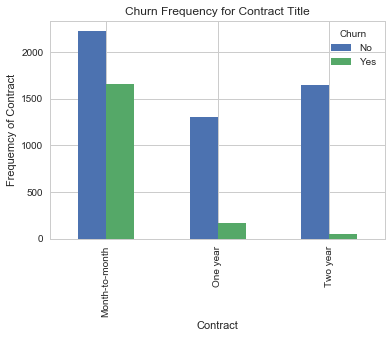

In [9]:
%matplotlib inline
pd.crosstab(churn.Contract,churn.Churn).plot(kind='bar')
plt.title('Churn Frequency for Contract Title')
plt.xlabel('Contract')
plt.ylabel('Frequemcy of Contract')
plt.savefig('Contract_Freq_Graph')

In [10]:
## Preprocessing
churn.loc[churn.OnlineSecurity=="No internet service","OnlineSecurity"]="No"
churn.loc[churn.OnlineBackup=="No internet service","OnlineBackup"]="No"
churn.loc[churn.DeviceProtection=="No internet service","DeviceProtection"]="No"
churn.loc[churn.TechSupport=="No internet service","TechSupport"]="No"
churn.loc[churn.StreamingTV=="No internet service","StreamingTV"]="No"
churn.loc[churn.StreamingMovies=="No internet service","StreamingMovies"]="No"
churn.loc[churn.MultipleLines=="No internet service","MultipleLines"]="No"

In [11]:
## Data Type Conversion
churn["SeniorCitizen"]=churn["SeniorCitizen"].astype(object)


In [12]:
total_rows = churn['Churn'].count()
for i in range(0,total_rows):
    churn.loc[i,"Charges"]=churn.loc[i,"tenure"]/churn.loc[i,"MonthlyCharges"]

In [13]:
churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Charges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.033501
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0.597015
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.037140
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1.063830
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.028289


In [14]:
#Nominal Variables
#"gender", "InternetService", "Contract", "PaymentMethod",

## Performing one hot encoding on the Ordinal Variables
cat_vars=["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","PaperlessBilling","SeniorCitizen","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(churn[var], prefix=var)
    data1=churn.join(cat_list)
    churn=data1

## Deleting the ordinal columns after performing one hot encoding
cat_vars=['customerID','MonthlyCharges','TotalCharges','tenure',"Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","PaperlessBilling","SeniorCitizen","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
data_vars=churn.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]



In [15]:
##Data to keep
data_final=churn[to_keep]
data_final.columns.values

array(['gender', 'InternetService', 'Contract', 'PaymentMethod', 'Churn',
       'Charges', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'PaperlessBilling_No', 'PaperlessBilling_Yes', 'SeniorCitizen_0',
       'SeniorCitizen_1', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes'], dtype=object)

In [16]:
data_final.head()

,gender,InternetService,Contract,PaymentMethod,Churn,Charges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,Female,DSL,Month-to-month,Electronic check,No,0.033501,0,1,1,0,...,0,1,1,0,1,0,1,0,1,0
1,Male,DSL,One year,Mailed check,No,0.597015,1,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,Male,DSL,Month-to-month,Mailed check,Yes,0.037140,1,0,1,0,...,0,1,1,0,1,0,1,0,1,0
3,Male,DSL,One year,Bank transfer (automatic),No,1.063830,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,Female,Fiber optic,Month-to-month,Electronic check,Yes,0.028289,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0


In [17]:
## One hot encoding to the nominal vairables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ordinal=["gender", "InternetService", "Contract", "PaymentMethod","Churn"]
for col in ordinal:
       # Encoding only categorical variables
       if data_final[col].dtypes=='object':
       # Using whole data to form an exhaustive list of levels
           data=data_final[col]
           le.fit(data.values)
           data_final[col]=le.transform(data_final[col])

C:\Users\Prudhvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [18]:
cat_vars=["Partner_No","Dependents_No","PhoneService_No","MultipleLines_No phone service","OnlineSecurity_No","PaperlessBilling_No","SeniorCitizen_0","OnlineBackup_No","DeviceProtection_No","TechSupport_No","StreamingTV_No","StreamingMovies_No"]
data_vars=data_final.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data_final[to_keep]
data_final.columns.values

array(['gender', 'InternetService', 'Contract', 'PaymentMethod', 'Churn',
       'Charges', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'PaperlessBilling_Yes', 'SeniorCitizen_1', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'], dtype=object)

In [19]:
data_final_vars=data_final.columns.values.tolist()
y=['Churn']
X=[i for i in data_final_vars if i not in y]
print(X)

X=data_final[X]
y=data_final[y]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

['gender', 'InternetService', 'Contract', 'PaymentMethod', 'Charges', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes', 'PaperlessBilling_Yes', 'SeniorCitizen_1', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes']


In [20]:
classifier = LogisticRegression(penalty='l2',C=5)
print(classifier)
result=classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(result.coef_))], axis = 1)
print(coefficients)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


C:\Users\Prudhvi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7919772807951722
                       0         0
0                 gender -0.063916
1        InternetService  0.017994
2               Contract -0.873185
3          PaymentMethod  0.012271
4                Charges -2.089382
5            Partner_Yes  0.091546
6         Dependents_Yes -0.241083
7       PhoneService_Yes -0.268947
8       MultipleLines_No -0.322587
9      MultipleLines_Yes  0.053639
10    OnlineSecurity_Yes -0.500645
11  PaperlessBilling_Yes  0.504264
12       SeniorCitizen_1  0.292376
13      OnlineBackup_Yes -0.175140
14  DeviceProtection_Yes -0.023317
15       TechSupport_Yes -0.440424
16       StreamingTV_Yes  0.285384
17   StreamingMovies_Yes  0.369508


In [21]:
y_pred_train = classifier.predict(X_train)
print(y_pred_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_train, y_pred_train)
classification_report = classification_report(y_train, y_pred_train)
print(confusion_matrix)
print(classification_report)

[0 0 1 ... 0 1 0]
[[3736  402]
 [ 770  726]]
             precision    recall  f1-score   support

          0       0.83      0.90      0.86      4138
          1       0.64      0.49      0.55      1496

avg / total       0.78      0.79      0.78      5634



In [22]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(classifier.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.79


In [23]:
y_pred_test = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test, y_pred_test)
classification_report = classification_report(y_test, y_pred_test)
print(confusion_matrix)
print(classification_report)

[[938  98]
 [180 193]]
             precision    recall  f1-score   support

          0       0.84      0.91      0.87      1036
          1       0.66      0.52      0.58       373

avg / total       0.79      0.80      0.79      1409



In [24]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [83]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_leaf=40,max_depth=10)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=40, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
clf = clf.fit(X_train, y_train)

In [85]:
y_pred_test = clf.predict(X_test)


In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test, y_pred_test)
classification_report = classification_report(y_test, y_pred_test)
print(confusion_matrix)
print(classification_report)

[[943  93]
 [179 194]]
             precision    recall  f1-score   support

          0       0.84      0.91      0.87      1036
          1       0.68      0.52      0.59       373

avg / total       0.80      0.81      0.80      1409



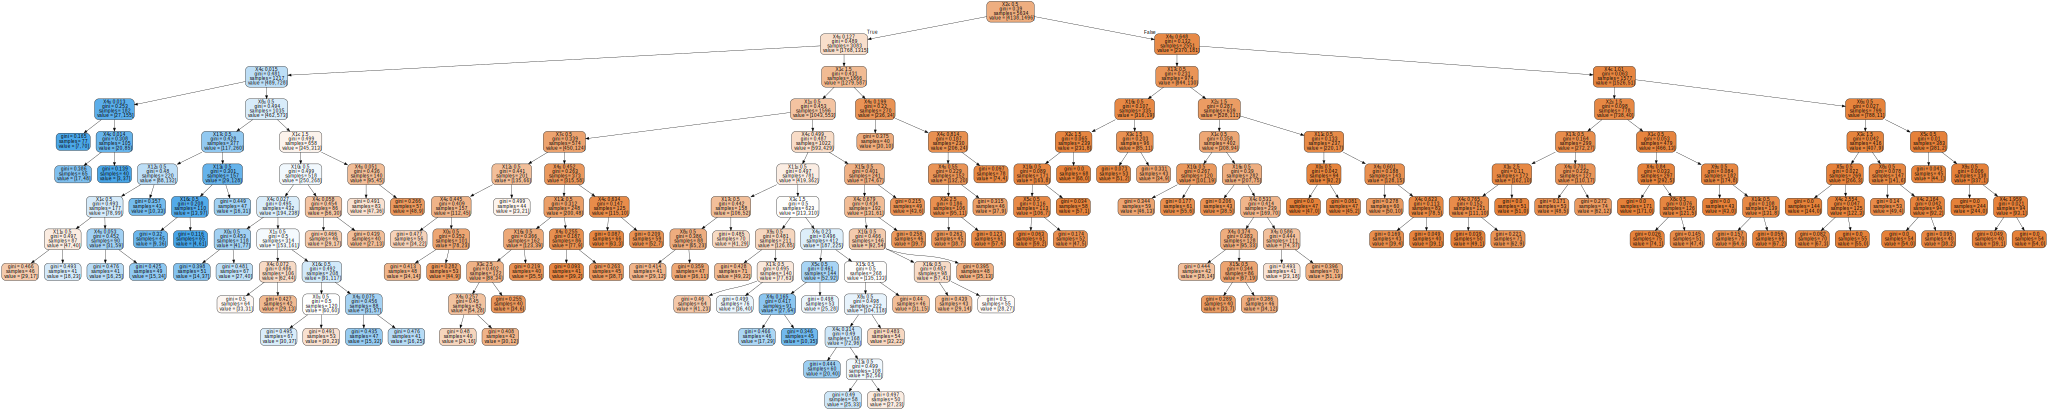

In [63]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [38]:
with open("fruit_classifier.txt", "w") as f:
    f = tree.export_graphviz(clf, out_file=f)
    
# converting into the pdf file
with open("fruit_classifier.dot", "w") as f:
    f = tree.export_graphviz(fruit_classifier, out_file=f)

In [37]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=none) 
graph = graphviz.Source(dot_data) 
graph

NameError: name 'f' is not defined